# Test Known Case

In [1]:
using PGFPlots

function _integrate_simpsons(f::Function, a::Real, b::Real, n::Int)
    # integrate using Composite Simpson's rule
    # reference: https://en.wikipedia.org/wiki/Simpson%27s_rule

    @assert(n > 0) # number of intervals
    @assert(mod(n,2) == 0) # n must be even

    h = (b-a)/n
    retval = f(a) + f(b)
    flip = true
    for i = 1 : n-1
        retval += f(a+i*h) * (flip ? 4 : 2)
        flip = !flip
    end
    return h/3*retval
end

_integrate_simpsons (generic function with 1 method)

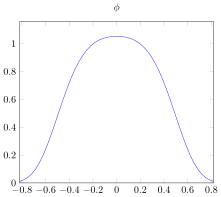

In [2]:
function Ptilde_ϕ(ϕ::Float64)
    ϕ = clamp(ϕ, -1.0, 1.0)
    f = [ϕ^2, ϕ^4]
    θ = [-1.0, -8.6]
    exp(dot(θ, f))
end

domain = (-0.82, 0.82)
Z = _integrate_simpsons(Ptilde_ϕ, domain..., 100)
p_ϕ = PGFPlots.Plots.Linear(x->Ptilde_ϕ(x)/Z, domain, style="mark=none")
Axis(p_ϕ, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\phi")

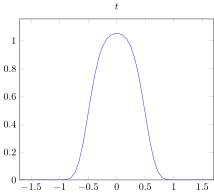

In [3]:
function Ptilde_t(t::Float64)
    t = clamp(t, -1.0, 1.0)
    f = [t^2, t^4]
    θ = [-1.0, -8.6]
    exp(dot(θ, f))
end

domain = (-1.7, 1.7)
p_t = PGFPlots.Plots.Linear(x->Ptilde_t(x)/Z, domain, style="mark=none")
Z = _integrate_simpsons(Ptilde_t, domain..., 100)
Axis(p_t, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"t")

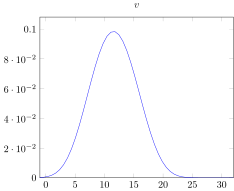

In [4]:
using Interact

w1 = -1.5
w2 = -10.0
w3 = -2.5
w4 = -10.0
# @manipulate for w1 in linspace(-10.0,10.0,41),
#                 w2 in linspace(-10.0,10.0,41),
#                 w3 in linspace(-10.0,10.0,41),
#                 w4 in linspace(-10.0,10.0,41)
    
function Ptilde_v(v::Float64)
    μ, σ = 13.0, 32.0-13.0
    v = (v - μ)/σ
    v = clamp(v, -1.0, 1.0)
    
    f = [v, v^2, v^3, v^4]
    θ = [w1, w2, w3, w4]
    exp(dot(θ, f))
end

domain = (-1.0, 32.0)

Z = _integrate_simpsons(Ptilde_v, domain..., 100)
p_v = PGFPlots.Plots.Linear(x->Ptilde_v(x)/Z, domain, style="mark=none")
Axis(p_v, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"v")
# end

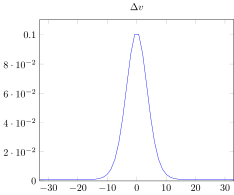

In [5]:
using Interact

w1 = -9.0
w2 =  4.5
# @manipulate for w1 in linspace(-20.0,20.0,41),
#                 w2 in linspace(-10.0,10.0,41),
#                 w3 in linspace(-10.0,10.0,41),
#                 w4 in linspace(-10.0,10.0,41)
    
    function Ptilde_dv(dv::Float64)
        μ, σ = 0.0, 15.0
        dv = (dv - μ)/σ
        dv = clamp(dv, -1.0, 1.0)

        f = [dv^2, dv^4]
        θ = [w1, w2]
        exp(dot(θ, f))
    end

    domain = (-33.0, 33.0)

    Z = _integrate_simpsons(Ptilde_dv, domain..., 100)
p_dv = PGFPlots.Plots.Linear(x->Ptilde_dv(x)/Z, domain, style="mark=none")    
Axis(p_dv, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\Delta v")
# end

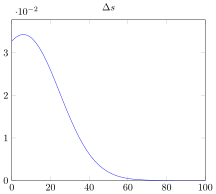

In [6]:
using Interact

w1 = -5.0
w2 = -7.5
w3 = 0.5
w4 = 2.0
# @manipulate for w1 in linspace(-20.0,20.0,41),
#                 w2 in linspace(-10.0,10.0,41),
#                 w3 in linspace(-10.0,10.0,41),
#                 w4 in linspace(-10.0,10.0,41)
    
    function Ptilde_ds(ds::Float64)
        μ, σ = 30.0, 70.0
        ds = (ds - μ)/σ
        ds = clamp(ds, -1.0, 1.0)

        f = [ds, ds^2, ds^3, ds^4]
        θ = [w1, w2, w3, w4]
        exp(dot(θ, f))
    end

    domain = (0.0, 100.0)

    Z = _integrate_simpsons(Ptilde_ds, domain..., 100)
    p_ds = PGFPlots.Plots.Linear(x->Ptilde_ds(x)/Z, domain, style="mark=none")
    Axis(p_ds, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\Delta s")
# end

# AutoScenes Sampling

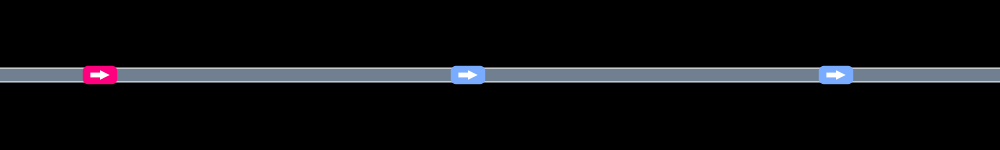

In [7]:
using AutomotiveDrivingModels
using AutoScenes
using AutoViz

scene, roadway = AutoScenes.get_start_scene_and_roadway(4)

car_colors = Dict{Int,Colorant}()
car_colors[2] = COLOR_CAR_EGO
car_colors[3] = COLOR_CAR_EGO
render(scene, roadway, cam=StaticCamera(VecE2(150.0,0.0), 8.0), canvas_height=150, car_colors=car_colors)

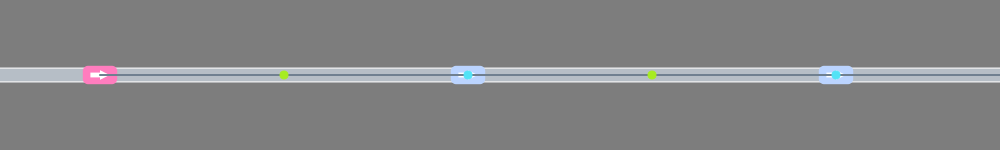

In [8]:
factors = create_shared_factors()
structure = gen_scene_structure(scene, roadway, factors)
overlays = SceneOverlay[Overwash(RGBA(1.0,1.0,1.0,0.7)), SceneStructureOverlay(structure)]
render(scene, roadway, overlays, cam=StaticCamera(VecE2(150.0,0.0), 8.0), canvas_height=150, car_colors=car_colors)

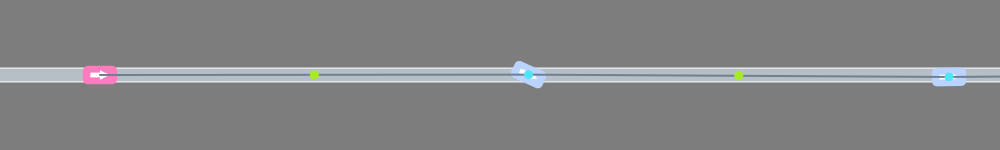

In [9]:
proposal_distribution = (Normal(0.0,10.0), Normal(0.0,1.0), Normal(0.0,2.0), Normal(0.0,0.2))
metropolis_hastings!(scene, structure, roadway, factors, proposal_distribution, 1000)
render(scene, roadway, overlays, cam=StaticCamera(VecE2(150.0,0.0), 8.0), canvas_height=150, car_colors=car_colors)

In [10]:
using DataFrames
t = Float64[]
v=Float64[]
ϕ=Float64[]
Δv=Float64[]
Δs=Float64[]

for i in 1 : 1000
    ncars = rand(4:10)
    scene, roadway = AutoScenes.get_start_scene_and_roadway(ncars)
    structure = gen_scene_structure(scene, roadway, factors)
    metropolis_hastings!(scene, structure, roadway, factors, proposal_distribution, 2000)
    
    for j in 2 : length(scene)-1
        push!(t, scene[j].state.posF.t)
        push!(v, scene[j].state.v)
        push!(ϕ, scene[j].state.posF.ϕ)
    end
    
    for j in 2 : length(scene)
        push!(Δs, scene[j].state.posF.s - scene[j-1].state.posF.s - 0.5*scene[j-1].def.length - 0.5*scene[j].def.length)
        push!(Δv, scene[j].state.v - scene[j-1].state.v)
    end
end

"DONE"

"DONE"

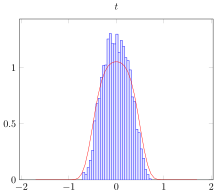

In [11]:
using PGFPlots

Axis([Plots.Histogram(t, discretization=:fd, density=true), p_t], ymin=0, title=L"t")

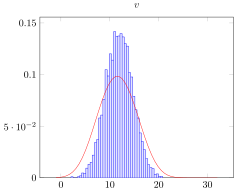

In [12]:
Axis([Plots.Histogram(v, discretization=:fd, density=true),p_v], ymin=0, title=L"v")

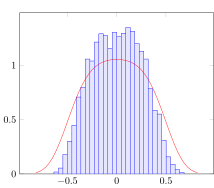

In [13]:
Axis([Plots.Histogram(ϕ, discretization=:fd, density=true), p_ϕ], ymin=0, title=L"ϕ")

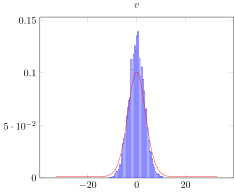

In [14]:
Axis([Plots.Histogram(Δv, discretization=:fd, density=true), p_dv], ymin=0, title=L"Δv")

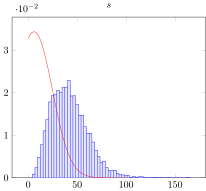

In [15]:
Axis([Plots.Histogram(Δs, discretization=:fd, density=true), p_ds], ymin=0, title=L"Δs")

# Learning

In [16]:
using AutomotiveDrivingModels
using AutoScenes
using AutoViz

factors = create_shared_factors()
scene, roadway = AutoScenes.get_start_scene_and_roadway(10)
proposal_distribution = (Normal(0.0,10.0), Normal(0.0,1.0), Normal(0.0,2.0), Normal(0.0,0.2))

vehdefs = Dict{Int, BoundingBoxDef}()
vehdefs[1] = scene[1].def
vehdefs[2] = scene[2].def
vehdefs[3] = scene[3].def
vehdefs[4] = scene[4].def
vehdefs[5] = scene[5].def
vehdefs[6] = scene[6].def
vehdefs[7] = scene[7].def
vehdefs[8] = scene[8].def
vehdefs[9] = scene[9].def
vehdefs[10] = scene[10].def

n_scenes = 100
states = TrajdataState[]
frames = Array(TrajdataFrame, n_scenes)
sources = Array(AutoScenes.SceneSource, n_scenes)
structures = Array(SceneStructure, n_scenes)

state_index = 0
for frame in 1 : n_scenes
    ncars = rand(4:10)
    scene, roadway = AutoScenes.get_start_scene_and_roadway(ncars)
    structure = gen_scene_structure(scene, roadway, factors)
    metropolis_hastings!(scene, structure, roadway, factors, proposal_distribution, 1000)
    
    for (i,veh) in enumerate(scene)
        push!(states,TrajdataState(i, veh.state))
    end
    
    frames[frame] = TrajdataFrame(state_index+1, state_index+length(scene), convert(Float64, frame))
    sources[frame] = AutoScenes.SceneSource(1, frame)
    structures[frame] = structure
    
    state_index += length(scene)
end

dset = SceneStructureDataset(
    [Trajdata(roadway, vehdefs, states, frames)],
    sources, structures, factors)

length(dset)

100

In [17]:
dat = PseudolikelihoodPrealloc(50);

In [18]:
tic()
plogl_opt = calc_pseudolikelihood(dset, dat=dat)
toc()
plogl_opt

elapsed time: 0.667070346 seconds


-32.27871171167359

In [19]:
plogls = Float64[]
reset_weights!(dset.factors, 1.0)
tic()
push!(plogls, calc_pseudolikelihood(dset, dat=dat))
toc()
plogls[1]

elapsed time: 0.381285295 seconds


-39.93915595717383

In [20]:
params = GradientStepParams(BatchSampler(dset))
params.grad_params.n_samples_monte_carlo_integration = 20
params.grad_params.n_samples_monte_carlo_pseudolikelihood = 20
params.factor_weight_min = -20.0
params.factor_weight_max =   5.0
params.gradient_min = -5.0
params.gradient_max = 5.0

learning_rate = 0.5
learning_rate_decay = 0.99
batch_size = 10
batch_size_increase = 2
t_start = now()

tic()
iter = 0
while iter < 500 # typemax(Int)
    iter += 1
    
    params.learning_rate = learning_rate
    params.batch_size = batch_size
    step!(params)
#     parallel_step!(params)
    
#     println("iter: ", iter)
#     println("time: ", now() - t_start)
    push!(plogls, calc_pseudolikelihood(dset, dat=dat, scene=params.grad_params.scene, rec=params.grad_params.rec))
# #     println("plogl: ", plogls[end])
#     println("learning rate: ", learning_rate)
#     println("batch_size:    ", batch_size)
#     println("n_samples:     ", )
#     println("weights: ")
#     for ϕ in dset.factors
#         println(ϕ.template.form, "  ", ϕ.weights)
#     end
#     println("")
    
    learning_rate *= learning_rate_decay
    batch_size = min(batch_size + batch_size_increase, length(dset))
end
toc()

1:   -0.152    -0.028    -0.032    -0.278    -0.022    -0.112    -0.414    -0.132  
2:   -0.276    -0.073    -0.032    -0.797    -0.017    -0.342  
3: 
1:   -0.232    -0.040    -0.021    -0.345     0.005    -0.112    -0.468    -0.215  
2:   -0.396    -0.123     0.005    -0.816     0.003    -0.348  
3: 
1:   -0.267    -0.043    -0.020    -0.303     0.025    -0.090    -0.400    -0.237  
2:   -0.413    -0.196     0.002    -0.676     0.014    -0.246  
3: 
1:   -0.279    -0.044     0.040    -0.253     0.024    -0.065    -0.310    -0.208  
2:   -0.446    -0.213    -0.034    -0.541     0.008    -0.182  
3: 
1:   -0.252    -0.046    -0.003    -0.199     0.021    -0.049    -0.260    -0.172  
2:   -0.420    -0.178    -0.017    -0.404    -0.001    -0.132  
3: 
1:   -0.232    -0.046    -0.004    -0.150     0.020    -0.035    -0.210    -0.136  
2:   -0.400    -0.160    -0.016    -0.344    -0.003    -0.103  
3: 
1:   -0.236    -0.041     0.011    -0.127     0.020    -0.026    -0.168    -0.112  
2:  

1366.873190934

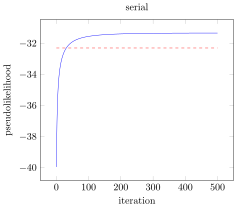

In [21]:
using PGFPlots

Axis([Plots.Linear(collect(0:length(plogls)-1), plogls, style="blue, mark=none"), 
    Plots.Linear([0,length(plogls)-1], [plogl_opt, plogl_opt], style="red, mark=none, dashed")],
xlabel="iteration", ylabel = "pseudolikelihood", title="serial")

# Parallel

In [22]:
if nworkers() < 3
    addprocs(3) 
end

@everywhere using AutoScenes

plogls = Float64[]
reset_weights!(dset.factors, 1.0)
tic()
push!(plogls, calc_pseudolikelihood(dset, dat=dat))
toc()
plogls[1]

params = GradientStepParams(BatchSampler(dset))
params.grad_params.n_samples_monte_carlo_integration = 20
params.grad_params.n_samples_monte_carlo_pseudolikelihood = 20
params.factor_weight_min = -20.0
params.factor_weight_max =   5.0
params.gradient_min = -5.0
params.gradient_max = 5.0

learning_rate = 0.5
learning_rate_decay = 0.99
batch_size = 10
batch_size_increase = 2
t_start = now()

tic()
iter = 0
while iter < 500 # typemax(Int)
    iter += 1
    
    params.learning_rate = learning_rate
    params.batch_size = batch_size
    parallel_step!(params)
    
#     println("iter: ", iter)
#     println("time: ", now() - t_start)
    push!(plogls, calc_pseudolikelihood(dset, dat=dat, scene=params.grad_params.scene, rec=params.grad_params.rec))
# #     println("plogl: ", plogls[end])
#     println("learning rate: ", learning_rate)
#     println("batch_size:    ", batch_size)
#     println("n_samples:     ", )
#     println("weights: ")
#     for ϕ in dset.factors
#         println(ϕ.template.form, "  ", ϕ.weights)
#     end
#     println("")
    
    learning_rate *= learning_rate_decay
    batch_size = min(batch_size + batch_size_increase, length(dset))
end
toc()

elapsed time: 0.351935308 seconds
elapsed time: 1097.269667191 seconds


1097.269667191

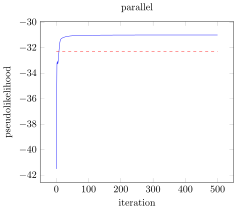

In [23]:
using PGFPlots

Axis([Plots.Linear(collect(0:length(plogls)-1), plogls, style="blue, mark=none"), 
    Plots.Linear([0,length(plogls)-1], [plogl_opt, plogl_opt], style="red, mark=none, dashed")],
xlabel="iteration", ylabel = "pseudolikelihood", title="parallel")

In [24]:
using DataFrames
t = Float64[]
v=Float64[]
ϕ=Float64[]
Δv=Float64[]
Δs=Float64[]

for i in 1 : 1000
    ncars = rand(4:10)
    scene, roadway = AutoScenes.get_start_scene_and_roadway(ncars)
    structure = gen_scene_structure(scene, roadway, factors)
    metropolis_hastings!(scene, structure, roadway, factors, proposal_distribution, 2000)
    
    for j in 2 : length(scene)-1
        push!(t, scene[j].state.posF.t)
        push!(v, scene[j].state.v)
        push!(ϕ, scene[j].state.posF.ϕ)
    end
    
    for j in 2 : length(scene)
        push!(Δs, scene[j].state.posF.s - scene[j-1].state.posF.s - 0.5*scene[j-1].def.length - 0.5*scene[j].def.length)
        push!(Δv, scene[j].state.v - scene[j-1].state.v)
    end
end

"DONE"

"DONE"

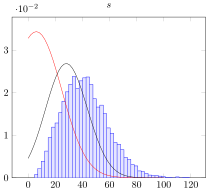

In [33]:
# NOTE: this is the marginal and it does not match perfectly because of the structure coupling -
#       a larger delta s between one pair of cars is a smaller delta s between the next pair

θ_ds2 = factors[2].weights[3:end]
function Ptilde_ds2(ds::Float64)
    μ, σ = 30.0, 70.0
    ds = (ds - μ)/σ
    ds = clamp(ds, -1.0, 1.0)

    f = [ds, ds^2, ds^3, ds^4]
    exp(dot(θ_ds2, f))
end

domain = (0.0, 100.0)
Z = _integrate_simpsons(Ptilde_ds2, domain..., 100)
p_ds2 = PGFPlots.Plots.Linear(x->Ptilde_ds2(x)/Z, domain, style="mark=none, black")

Axis([Plots.Histogram(Δs, discretization=:fd, density=true), p_ds, p_ds2], ymin=0, title=L"Δs")